# 1. Library

In [ ]:
import tensorflow as tf 
import numpy as np
import os
from glob import glob

import pandas as pd

from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

# 2. Mount the Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# 3. Read the dataset

In [ ]:
base_dir = '/content/drive/My Drive/MasterProject/data'
print(base_dir)

/content/drive/My Drive/MasterProject/data


In [ ]:
classes_path = glob(os.path.join(base_dir+'/*/'))
print(classes_path)
print(len(classes_path))

['/content/drive/My Drive/MasterProject/data/Dahlia/', '/content/drive/My Drive/MasterProject/data/Helleborus/']
2


# Add with Data Augmentation more images to dataset

In [ ]:
def image_augmentation(image_path,save_dir,value):

  ### Add more images with Data Augmentation ###

  dataset=ImageDataGenerator(rescale = 1.0/255.,
                           horizontal_flip = True,
                           #shear_range=0.1,
                           zoom_range=0.1,
                           #brightness_range=(0.95,1.05),
                           rotation_range=15,
                           fill_mode="constant",
                           cval=0  # fill edge pixels with black; default fills with long lines of color
                           )
  
  #This is because opencv uses BGR instead of RGB.
  #Blue and Red colors are being swapped. 
  #Convert the BGR to RGB in opencv.

  image = cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB)
  image = np.expand_dims(image, 0)
    
  image = dataset.flow(image,
                       save_to_dir=save_dir,
                       save_prefix='aug',
                       save_format='jpg',
                       batch_size=1)
  for img in range(int((25-value)/value)):
    image.next()
  return image

In [ ]:
for genus in classes_path:
  genus_m = glob(os.path.join(genus+"/*/"))
  dir = os.path.join(genus)

  for name in genus_m:
    name_m = glob(os.path.join(name+"*.*"))
    save_dir = os.path.join(name)
    value = len(name_m)

    for image in name_m:
      image_augmentation(image,save_dir,value) 

# 4. Create the Data frame 

In [ ]:
plantname = glob('/content/drive/My Drive/MasterProject/data/*/*/*.*')

In [ ]:
# make plantname as serie object
plantname = pd.Series(plantname)

In [ ]:
# base_df: a dataframe with 3 fields: Genus_name, Class_name and File_name
base_df = pd.DataFrame()

# generate Genus name field
base_df['Genus_name'] = plantname.map(lambda plantname: plantname.split("/")[-3])

# generate Class name field
base_df['Class_name'] = plantname.map(lambda plantname: plantname.split("/")[-2])

# generate File name field
base_df['File_name'] = plantname.map(lambda plantname: plantname.split("/")[-1])

base_df['File_path'] = plantname.map(lambda plantname: plantname)
base_df.head()
#save base_df

,Genus_name,Class_name,File_name,File_path
0,Dahlia,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0002.png,/content/drive/My Drive/MasterProject/data/Dah...
1,Dahlia,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0001.png,/content/drive/My Drive/MasterProject/data/Dah...
2,Dahlia,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0003.jpg,/content/drive/My Drive/MasterProject/data/Dah...
3,Dahlia,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0004.jpg,/content/drive/My Drive/MasterProject/data/Dah...
4,Dahlia,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0005.jpg,/content/drive/My Drive/MasterProject/data/Dah...


# 6. Save the dataset

In [ ]:
filepath = Path('/content/drive/My Drive/MasterProject/plant.xlsx')
base_df.to_csv(filepath,index=False)

# 5. Data exploration

In [ ]:
class_distribution = base_df['Genus_name'].value_counts()
class_distribution

Dahlia        1338
Helleborus     163
Name: Genus_name, dtype: int64

**5.1 Is it NULL?**

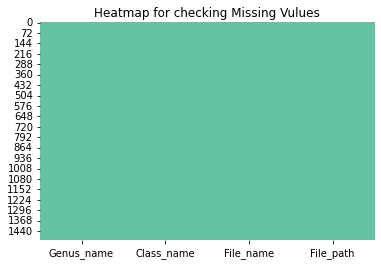

Fig 1: Heatmap for checking Missing Values


In [ ]:
sns.heatmap(base_df.isnull(), cbar = False, cmap='Set2')
plt.title('Heatmap for checking Missing Vulues')
plt.show()
print('Fig 1: Heatmap for checking Missing Values');

In [ ]:
base_df.isnull().sum()

Genus_name    0
Class_name    0
File_name     0
File_path     0
dtype: int64

In [ ]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Genus_name  1501 non-null   object
 1   Class_name  1501 non-null   object
 2   File_name   1501 non-null   object
 3   File_path   1501 non-null   object
dtypes: object(4)
memory usage: 47.0+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


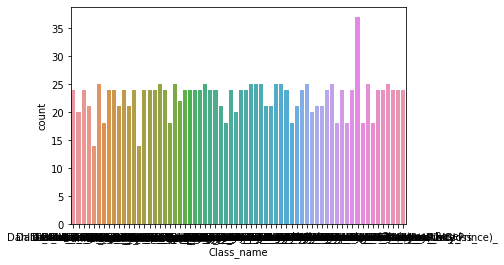

In [ ]:
sns.countplot(base_df['Class_name']);

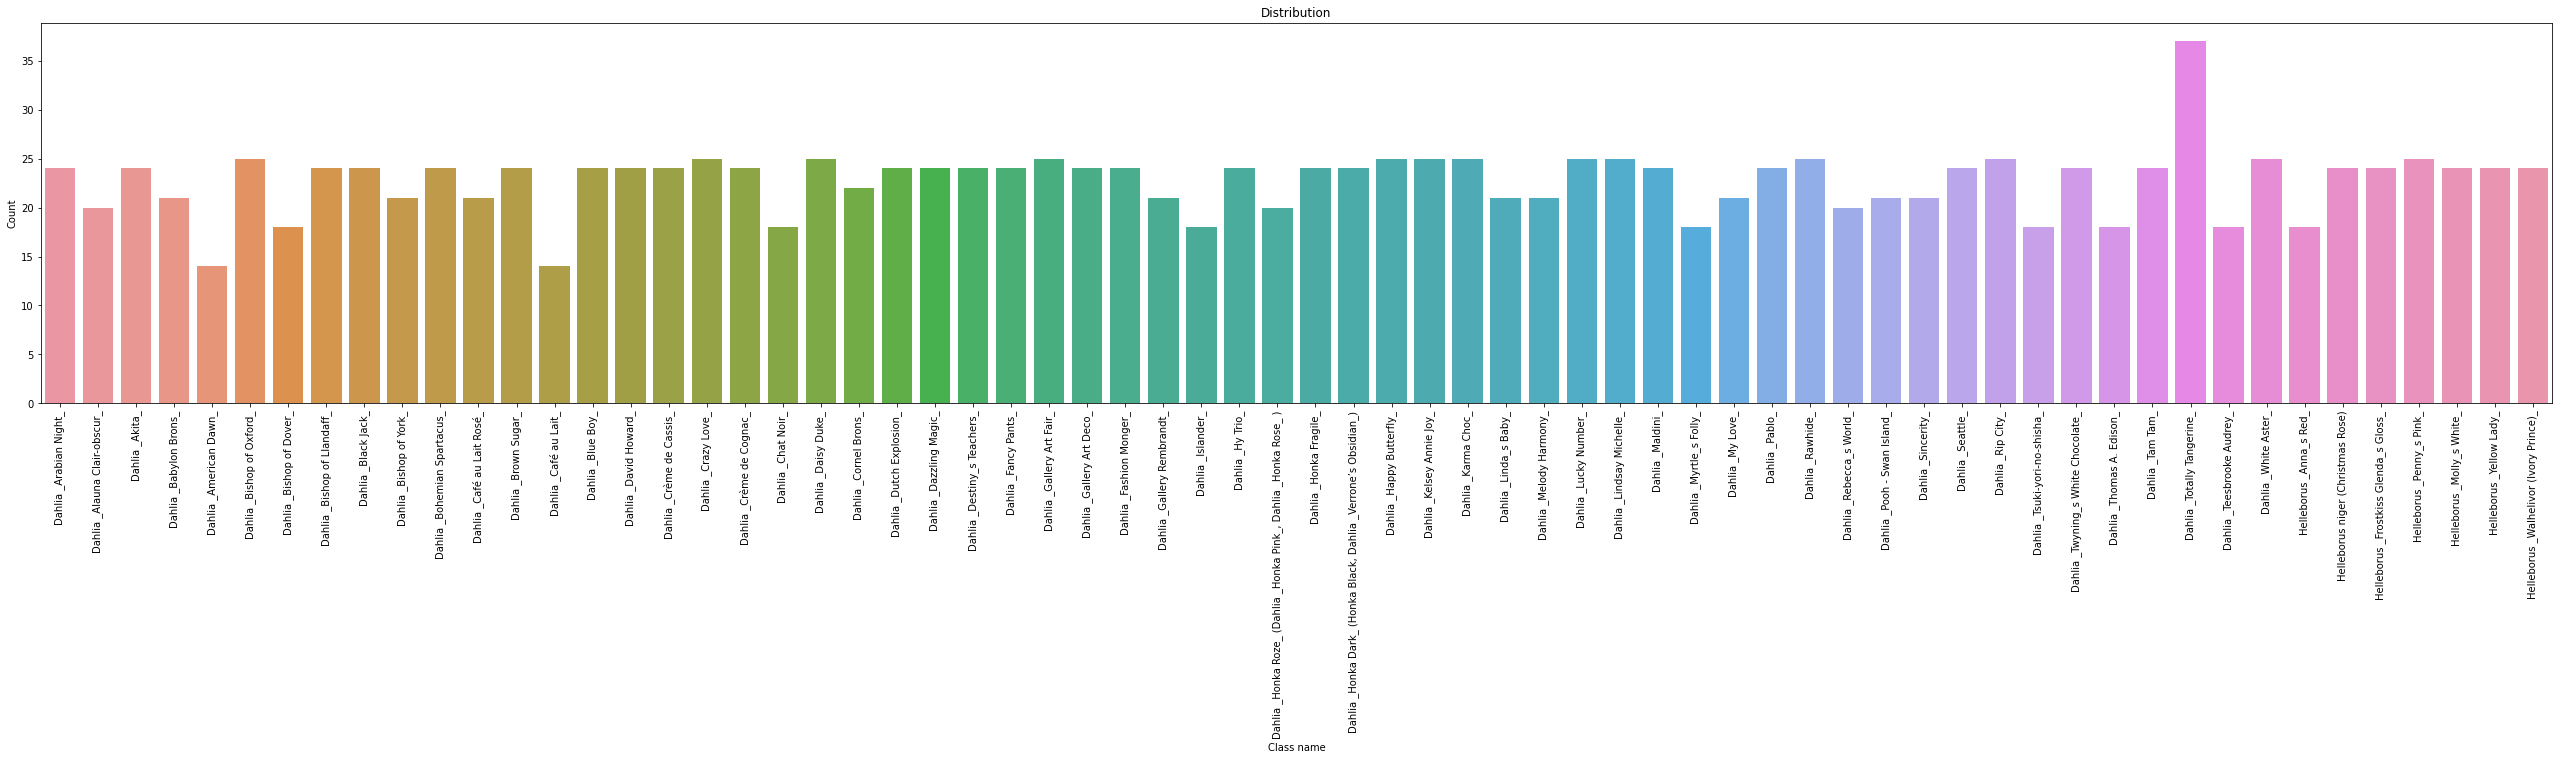

Fig 5: Distribution.


In [ ]:
plt.figure(figsize=(45,7))
plt.xticks(rotation=90)
sns.countplot(x='Class_name', data = base_df)
plt.xlabel('Class name')
plt.ylabel('Count')
plt.title('Distribution')
plt.show()
print('Fig 5: Distribution.');

# 7. Data visualisation

In [ ]:
plot_df = base_df.sample(25).reset_index()
plt.figure(figsize=(35, 35))


for i in range(25):
    img_name = plot_df.loc[i, 'File_name']
    cl_name = (plot_df.loc[i, 'Class_name'])
    label_str = (plot_df.loc[i, 'Genus_name'])
    plt.subplot(5,5,i+1)
    plt.imshow(plt.imread(os.path.join('/content/drive/My Drive/MasterProject/data/',label_str, cl_name, img_name)))
    plt.title(cl_name)
    plt.xticks([])
    plt.yticks([])

Output hidden; open in https://colab.research.google.com to view.

# Create the metrics dataframe for saving the results.

In [ ]:
# Create dataframe to save accuracy and loss.
df_metrics = pd.DataFrame(columns=['Name of a Model',
                                   'Training Accuracy, %',
                                   'Top 5 Training accuracy, %',
                                   'Validation accuracy, %',
                                   'Top 5 Validation accuracy, %',
                                   'Training loss',
                                   'Validation loss'])

In [ ]:
filepath_metrics = Path('/content/drive/My Drive/MasterProject/metrics.xlsx')
df_metrics.to_csv(filepath_metrics,index=False)

In [ ]:
# Create dataframe to save accuracy for test image.
df_result = pd.DataFrame(columns=['Model',
                                  'True Name',
                                  'Name of a Plant',
                                   '%',])

In [ ]:
filepath_result = Path('/content/drive/My Drive/MasterProject/result.xlsx')
df_result.to_csv(filepath_result,index=False)

In [ ]:
# Create dataframe to save accuracy for test image.
df_result_test = pd.DataFrame(columns=['Name of a Plant','%'])

In [ ]:
filepath_result_test = Path('/content/drive/My Drive/MasterProject/result_test.xlsx')
df_result_test.to_csv(filepath_result_test,index=False)

In [ ]:
# Create dataframe to save accuracy for test image.
df_result_end = pd.DataFrame(columns=['True Name',
                                  'Name of a Plant',
                                   '%',])

In [ ]:
filepath_result_end = Path('/content/drive/My Drive/MasterProject/result_end.xlsx')
df_result_end.to_csv(filepath_result_end,index=False)

# Train/validation/test split

In [ ]:
import splitfolders

In [ ]:
pip install split-folders[full]

In [ ]:
split_dir_dahlia = "/content/drive/My Drive/MasterProject/split_data/Dahlia"

split_dir_dahlia_train = "/content/drive/My Drive/MasterProject/split_data/Dahlia/train"
split_dir_dahlia_validation = "/content/drive/My Drive/MasterProject/split_data/Dahlia/val"
split_dir_dahlia_test = "/content/drive/My Drive/MasterProject/split_data/Dahlia/test"

#splitfolders.ratio(base_dir_, output=split_dir, seed=42, ratio=(.8, .15, .05))

In [ ]:
split_dir_helleborus = "/content/drive/My Drive/MasterProject/split_data/Helleborus"

split_dir_helleborus_train = "/content/drive/My Drive/MasterProject/split_data/Helleborus/train"
split_dir_helleborus_validation = "/content/drive/My Drive/MasterProject/split_data/Helleborus/val"
split_dir_helleborus_test = "/content/drive/My Drive/MasterProject/split_data/Helleborus/test"

In [ ]:
classes_path_dahlia_train = glob(os.path.join(split_dir_dahlia_train+'/*'))
print(classes_path_dahlia_train)
print(len(classes_path_dahlia_train))

['/content/drive/My Drive/MasterProject/split_data/Dahlia/train/Dahlia _Arabian Night_', '/content/drive/My Drive/MasterProject/split_data/Dahlia/train/Dahlia _Alauna Clair-obscur_', '/content/drive/My Drive/MasterProject/split_data/Dahlia/train/Dahlia _Akita_', '/content/drive/My Drive/MasterProject/split_data/Dahlia/train/Dahlia _Babylon Brons_', '/content/drive/My Drive/MasterProject/split_data/Dahlia/train/Dahlia _American Dawn_', '/content/drive/My Drive/MasterProject/split_data/Dahlia/train/Dahlia _Bishop of Oxford_', '/content/drive/My Drive/MasterProject/split_data/Dahlia/train/Dahlia _Bishop of Dover_', '/content/drive/My Drive/MasterProject/split_data/Dahlia/train/Dahlia _Bishop of Llandaff_', '/content/drive/My Drive/MasterProject/split_data/Dahlia/train/Dahlia _Black Jack_', '/content/drive/My Drive/MasterProject/split_data/Dahlia/train/Dahlia _Bishop of York_', '/content/drive/My Drive/MasterProject/split_data/Dahlia/train/Dahlia _Bohemian Spartacus_', '/content/drive/My D

In [ ]:
classes_path_helleborus_train = glob(os.path.join(split_dir_helleborus_train+'/*'))
print(classes_path_helleborus_train)
print(len(classes_path_helleborus_train))

['/content/drive/My Drive/MasterProject/split_data/Helleborus/train/Helleborus _Anna_s Red_', '/content/drive/My Drive/MasterProject/split_data/Helleborus/train/Helleborus niger (Christmas Rose)', '/content/drive/My Drive/MasterProject/split_data/Helleborus/train/Helleborus _Frostkiss Glenda_s Gloss_', '/content/drive/My Drive/MasterProject/split_data/Helleborus/train/Helleborus _Penny_s Pink_', '/content/drive/My Drive/MasterProject/split_data/Helleborus/train/Helleborus _Molly_s White_', '/content/drive/My Drive/MasterProject/split_data/Helleborus/train/Helleborus _Yellow Lady_', '/content/drive/My Drive/MasterProject/split_data/Helleborus/train/Helleborus _Walhelivor (Ivory Prince)_']
7


In [ ]:
dahlianame_train = glob('/content/drive/My Drive/MasterProject/split_data/Dahlia/train/*/*.*')
dahlianame_validation = glob('/content/drive/My Drive/MasterProject/split_data/Dahlia/val/*/*.*')
dahlianame_test = glob('/content/drive/My Drive/MasterProject/split_data/Dahlia/test/*/*.*')

In [ ]:
helleborusname_train = glob('/content/drive/My Drive/MasterProject/split_data/Helleborus/train/*/*.*')
helleborusname_validation = glob('/content/drive/My Drive/MasterProject/split_data/Helleborus/val/*/*.*')
helleborusname_test = glob('/content/drive/My Drive/MasterProject/split_data/Helleborus/test/*/*.*')

In [ ]:
print(dahlianame_test)

['/content/drive/My Drive/MasterProject/split_data/Dahlia/test/Dahlia _Arabian Night_/Dahlia _Arabian Night_ 0004.jpg', '/content/drive/My Drive/MasterProject/split_data/Dahlia/test/Dahlia _Arabian Night_/aug_0_9110.jpg', '/content/drive/My Drive/MasterProject/split_data/Dahlia/test/Dahlia _Alauna Clair-obscur_/Dahlia _Alauna Clair-obscur_ 0005.jpg', '/content/drive/My Drive/MasterProject/split_data/Dahlia/test/Dahlia _Akita_/Dahlia _Akita_ 0004.jpg', '/content/drive/My Drive/MasterProject/split_data/Dahlia/test/Dahlia _Akita_/aug_0_7249.jpg', '/content/drive/My Drive/MasterProject/split_data/Dahlia/test/Dahlia _Babylon Brons_/Dahlia _Babylon Brons_ 0004.jpg', '/content/drive/My Drive/MasterProject/split_data/Dahlia/test/Dahlia _Babylon Brons_/aug_0_9988.jpg', '/content/drive/My Drive/MasterProject/split_data/Dahlia/test/Dahlia _American Dawn_/Dahlia _American Dawn_ 0011.jpg', '/content/drive/My Drive/MasterProject/split_data/Dahlia/test/Dahlia _Bishop of Oxford_/Dahlia _Bishop of Oxfo

In [ ]:
print(helleborusname_test)

['/content/drive/My Drive/MasterProject/split_data/Helleborus/test/Helleborus _Anna_s Red_/Helleborus _Anna_s Red_ 0001.jpg', '/content/drive/My Drive/MasterProject/split_data/Helleborus/test/Helleborus _Anna_s Red_/Helleborus _Anna_s Red_ 0004.jpg', '/content/drive/My Drive/MasterProject/split_data/Helleborus/test/Helleborus niger (Christmas Rose)/aug_0_1074.jpg', '/content/drive/My Drive/MasterProject/split_data/Helleborus/test/Helleborus niger (Christmas Rose)/aug_0_8183.jpg', '/content/drive/My Drive/MasterProject/split_data/Helleborus/test/Helleborus _Frostkiss Glenda_s Gloss_/image27.jpg', '/content/drive/My Drive/MasterProject/split_data/Helleborus/test/Helleborus _Frostkiss Glenda_s Gloss_/Helleborus _Frostkiss Glenda_s Gloss_ 0004.jpg', '/content/drive/My Drive/MasterProject/split_data/Helleborus/test/Helleborus _Penny_s Pink_/Helleborus _Penny_s Pink_ 0004.jpg', '/content/drive/My Drive/MasterProject/split_data/Helleborus/test/Helleborus _Penny_s Pink_/aug_0_7336.jpg', '/cont

In [ ]:
print(len(dahlianame_train),len(dahlianame_validation),len(dahlianame_test))

1054 170 114


In [ ]:
print(len(helleborusname_train),len(helleborusname_validation),len(helleborusname_test))

129 20 14


In [ ]:
# make plantname as series object
dahlianame_train = pd.Series(dahlianame_train)
dahlianame_validation = pd.Series(dahlianame_validation)
dahlianame_test = pd.Series(dahlianame_test)

In [ ]:
# make plantname as series object
helleborusname_train = pd.Series(helleborusname_train)
helleborusname_validation = pd.Series(helleborusname_validation)
helleborusname_test = pd.Series(helleborusname_test)

In [ ]:
# base_df: a dataframe with 3 fields: Genus_name, Class_name and File_name
dahlia_df_train = pd.DataFrame()
dahlia_df_validation = pd.DataFrame()
dahlia_df_test = pd.DataFrame()

# generate Class name field
dahlia_df_train['Class_name'] = dahlianame_train.map(lambda dahlianame_train: dahlianame_train.split("/")[-2])
dahlia_df_validation['Class_name'] = dahlianame_validation.map(lambda dahlianame_validation: dahlianame_validation.split("/")[-2])
dahlia_df_test['Class_name'] = dahlianame_test.map(lambda dahlianame_test: dahlianame_test.split("/")[-2])

# generate File name field
dahlia_df_train['File_name'] = dahlianame_train.map(lambda dahlianame_train: dahlianame_train.split("/")[-1])
dahlia_df_validation['File_name'] = dahlianame_validation.map(lambda dahlianame_validation: dahlianame_validation.split("/")[-1])
dahlia_df_test['File_name'] = dahlianame_test.map(lambda dahlianame_test: dahlianame_test.split("/")[-1])

dahlia_df_train['File_path'] = dahlianame_train.map(lambda dahlianame_train: dahlianame_train)
dahlia_df_validation['File_path'] = dahlianame_validation.map(lambda dahlianame_validation: dahlianame_validation)
dahlia_df_test['File_path'] = dahlianame_test.map(lambda dahlianame_test: dahlianame_test)

dahlia_df_train.head()

,Class_name,File_name,File_path
0,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0002.png,/content/drive/My Drive/MasterProject/split_da...
1,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0003.jpg,/content/drive/My Drive/MasterProject/split_da...
2,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0005.jpg,/content/drive/My Drive/MasterProject/split_da...
3,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0006.jpg,/content/drive/My Drive/MasterProject/split_da...
4,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0007.jpg,/content/drive/My Drive/MasterProject/split_da...


In [ ]:
# a dataframe with 2 fields: Class_name and File_name
helleborus_df_train = pd.DataFrame()
helleborus_df_validation = pd.DataFrame()
helleborus_df_test = pd.DataFrame()

# generate Class name field
helleborus_df_train['Class_name'] = helleborusname_train.map(lambda helleborusname_train: helleborusname_train.split("/")[-2])
helleborus_df_validation['Class_name'] = helleborusname_validation.map(lambda helleborusname_validation: helleborusname_validation.split("/")[-2])
helleborus_df_test['Class_name'] = helleborusname_test.map(lambda helleborusname_test: helleborusname_test.split("/")[-2])

# generate File name field
helleborus_df_train['File_name'] = helleborusname_train.map(lambda helleborusname_train: helleborusname_train.split("/")[-1])
helleborus_df_validation['File_name'] = helleborusname_validation.map(lambda helleborusname_validation: helleborusname_validation.split("/")[-1])
helleborus_df_test['File_name'] = helleborusname_test.map(lambda helleborusname_test: helleborusname_test.split("/")[-1])

helleborus_df_train['File_path'] = helleborusname_train.map(lambda helleborusname_train: helleborusname_train)
helleborus_df_validation['File_path'] = helleborusname_validation.map(lambda helleborusname_validation: helleborusname_validation)
helleborus_df_test['File_path'] = helleborusname_test.map(lambda helleborusname_test: helleborusname_test)

helleborus_df_train.head()

,Class_name,File_name,File_path
0,Helleborus _Anna_s Red_,image1.jpg,/content/drive/My Drive/MasterProject/split_da...
1,Helleborus _Anna_s Red_,image26.jpg,/content/drive/My Drive/MasterProject/split_da...
2,Helleborus _Anna_s Red_,image25.jpg,/content/drive/My Drive/MasterProject/split_da...
3,Helleborus _Anna_s Red_,image27.jpg,/content/drive/My Drive/MasterProject/split_da...
4,Helleborus _Anna_s Red_,Helleborus _Anna_s Red_ 0002.jpg,/content/drive/My Drive/MasterProject/split_da...


# Save the dataframes to Drive

In [ ]:
filepath_d_tr = Path('/content/drive/My Drive/MasterProject/dahlianame_train.xlsx')
dahlia_df_train.to_csv(filepath_d_tr,index=False)
filepath_d_v = Path('/content/drive/My Drive/MasterProject/dahlianame_validation.xlsx')
dahlia_df_validation.to_csv(filepath_d_v,index=False)
filepath_d_t = Path('/content/drive/My Drive/MasterProject/dahlianame_test.xlsx')
dahlia_df_test.to_csv(filepath_d_t,index=False)

In [ ]:
filepath_h_tr = Path('/content/drive/My Drive/MasterProject/helleborusname_train.xlsx')
helleborus_df_train.to_csv(filepath_h_tr,index=False)
filepath_h_v = Path('/content/drive/My Drive/MasterProject/helleborusname_validation.xlsx')
helleborus_df_validation.to_csv(filepath_h_v,index=False)
filepath_h_t = Path('/content/drive/My Drive/MasterProject/helleborusname_test.xlsx')
helleborus_df_test.to_csv(filepath_h_t,index=False)

In [ ]:
dahlia_df_train = pd.read_csv('/content/drive/My Drive/MasterProject/dahlianame_train.xlsx',dtype=str)
dahlia_df_validation = pd.read_csv('/content/drive/My Drive/MasterProject/dahlianame_validation.xlsx',dtype=str)
dahlia_df_test = pd.read_csv('/content/drive/My Drive/MasterProject/dahlianame_test.xlsx',dtype=str)

helleborus_df_train = pd.read_csv('/content/drive/My Drive/MasterProject/helleborusname_train.xlsx',dtype=str)
helleborus_df_validation = pd.read_csv('/content/drive/My Drive/MasterProject/helleborusname_validation.xlsx',dtype=str)
helleborus_df_test = pd.read_csv('/content/drive/My Drive/MasterProject/helleborusname_test.xlsx',dtype=str)

# Create the Cultivar dataframe by merging the Dahlia and Helleborus dataframes and save it to Drive

In [ ]:
cultivar_df_train = pd.concat([dahlia_df_train,helleborus_df_train])
cultivar_df_validation = pd.concat([dahlia_df_validation,helleborus_df_validation])
cultivar_df_test = pd.concat([dahlia_df_test,helleborus_df_test])

In [ ]:
cultivar_df_train

,Class_name,File_name,File_path
0,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0002.png,/content/drive/My Drive/MasterProject/split_da...
1,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0003.jpg,/content/drive/My Drive/MasterProject/split_da...
2,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0005.jpg,/content/drive/My Drive/MasterProject/split_da...
3,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0006.jpg,/content/drive/My Drive/MasterProject/split_da...
4,Dahlia _Arabian Night_,Dahlia _Arabian Night_ 0007.jpg,/content/drive/My Drive/MasterProject/split_da...
...,...,...,...
124,Helleborus _Walhelivor (Ivory Prince)_,aug_0_1994.jpg,/content/drive/My Drive/MasterProject/split_da...
125,Helleborus _Walhelivor (Ivory Prince)_,aug_0_9267.jpg,/content/drive/My Drive/MasterProject/split_da...
126,Helleborus _Walhelivor (Ivory Prince)_,aug_0_5242.jpg,/content/drive/My Drive/MasterProject/split_da...
127,Helleborus _Walhelivor (Ivory Prince)_,aug_0_7473.jpg,/content/drive/My Drive/MasterProject/split_da...


In [ ]:
cultivar_value = cultivar_df_train['File_name'].value_counts().sum()
cultivar_value

1183

# Add Genus column

In [ ]:
cultivar_df_train.insert(0,"Genus",cultivar_df_train["Class_name"].str.split().str[0])
cultivar_df_validation.insert(0,"Genus",cultivar_df_validation["Class_name"].str.split().str[0])
cultivar_df_test.insert(0,"Genus",cultivar_df_test["Class_name"].str.split().str[0])

In [ ]:
cultivar_df_validation

,Genus,Class_name,File_name,File_path
0,Dahlia,Dahlia _Akita_,Dahlia _Akita_ 0001.png,/content/drive/My Drive/MasterProject/split_da...
1,Dahlia,Dahlia _Akita_,Dahlia _Akita_ 0008.jpg,/content/drive/My Drive/MasterProject/split_da...
2,Dahlia,Dahlia _Akita_,aug_0_1595.jpg,/content/drive/My Drive/MasterProject/split_da...
3,Dahlia,Dahlia _Bishop of Llandaff_,Dahlia _Bishop of Llandaff_ 0001.png,/content/drive/My Drive/MasterProject/split_da...
4,Dahlia,Dahlia _Bishop of Llandaff_,Dahlia _Bishop of Llandaff_ 0008.jpg,/content/drive/My Drive/MasterProject/split_da...
...,...,...,...,...
185,Helleborus,Helleborus _Yellow Lady_,aug_0_3243.jpg,/content/drive/My Drive/MasterProject/split_da...
186,Helleborus,Helleborus _Yellow Lady_,aug_0_3352.jpg,/content/drive/My Drive/MasterProject/split_da...
187,Helleborus,Helleborus _Walhelivor (Ivory Prince)_,Helleborus _Walhelivor (Ivory Prince)_ 0001.jpg,/content/drive/My Drive/MasterProject/split_da...
188,Helleborus,Helleborus _Walhelivor (Ivory Prince)_,aug_0_2776.jpg,/content/drive/My Drive/MasterProject/split_da...


# Save the Dataframes

In [ ]:
filepath_c_tr = Path('/content/drive/My Drive/MasterProject/cultivarname_train.xlsx')
cultivar_df_train.to_csv(filepath_c_tr,index=False)
filepath_c_v = Path('/content/drive/My Drive/MasterProject/cultivarname_validation.xlsx')
cultivar_df_validation.to_csv(filepath_c_v,index=False)
filepath_c_t = Path('/content/drive/My Drive/MasterProject/cultivarname_test.xlsx')
cultivar_df_test.to_csv(filepath_c_t,index=False)

In [ ]:
cultivar_df_train = pd.read_csv('/content/drive/My Drive/MasterProject/cultivarname_train.xlsx',dtype=str)
cultivar_df_validation = pd.read_csv('/content/drive/My Drive/MasterProject/cultivarname_validation.xlsx',dtype=str)
cultivar_df_test = pd.read_csv('/content/drive/My Drive/MasterProject/cultivarname_test.xlsx',dtype=str)

In [ ]:
split_dir_helleborus = "/content/drive/My Drive/MasterProject/split_data/Helleborus"
#base_dir_ = "/content/drive/My Drive/MasterProject/data/Helleborus"

#splitfolders.ratio(base_dir_, output=split_dir, seed=42, ratio=(.8, .15, .05))

In [ ]:
labels_genus = base_df['Genus_name'].unique()
len(labels_genus)

2

In [ ]:
labels_unique = base_df['Class_name'].unique()
len(labels_unique)

66

In [ ]:
labels_dahlia = (base_df.loc[base_df['Genus_name'] == "Dahlia"])['Class_name'].unique()
len(labels_dahlia)

59

In [ ]:
labels_helleborus = (base_df.loc[base_df['Genus_name'] == "Helleborus"])['Class_name'].unique()
len(labels_helleborus)

7

In [ ]:
list_of_labels = [labels_genus,labels_unique,labels_dahlia,labels_helleborus]

In [ ]:
pip install matplotlib==3.4

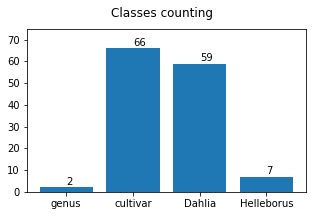

In [ ]:
list_of_labels = {'genus': len(labels_genus),
        'cultivar': len(labels_unique),
        'Dahlia': len(labels_dahlia),
        'Helleborus': len(labels_helleborus)}
names = list(list_of_labels.keys())
values = list(list_of_labels.values())

fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(names, values)
for index,data in enumerate(values):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.ylim([0, 75])
fig.suptitle('Classes counting')
plt.show()

In [ ]:
labels_helleborus = []
for directories in os.listdir(split_dir_helleborus + "/train"):
    labels_helleborus.append(directories)

number_of_labels_helleborus = len(labels_helleborus)
print(labels_helleborus)
print(number_of_labels_helleborus)

['Helleborus _Anna_s Red_', 'Helleborus niger (Christmas Rose)', 'Helleborus _Frostkiss Glenda_s Gloss_', 'Helleborus _Penny_s Pink_', 'Helleborus _Molly_s White_', 'Helleborus _Yellow Lady_', 'Helleborus _Walhelivor (Ivory Prince)_']
7


In [ ]:
classes_path = glob(os.path.join(split_dir+'/*/*/*/'))
classes_path

[]

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   horizontal_flip = True,
                                   zoom_range=0.1, 
                                   rotation_range=15,
                                   fill_mode="constant",
                                   cval=0)
                               
train_generator = train_datagen.flow_from_directory(split_dir + "train", 
                                                    batch_size=batch_size,
                                                    target_size=(image_size,image_size),
                                                    classes = labels_unique,
                                                    class_mode='categorical' 
                                                    )

validation_datagen = ImageDataGenerator(rescale = 1/255)

validation_generator = validation_datagen.flow_from_directory(split_dir + "val", 
                                                        batch_size=batch_size,
                                                        target_size=(image_size,image_size),
                                                        classes = labels_unique, 
                                                        class_mode='categorical' 
                                                        )